In [2]:
import sys,os,re,csv,codecs,numpy as np,pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense,Input,LSTM,Embedding,Dropout,Activation
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers,regularizers,constraints,optimizers,layers

Using TensorFlow backend.


In [3]:
train = pd.read_csv("train.csv")

In [4]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [8]:
train['comment_text'][train['id']=='000113f07ec002fd']

2    Hey man, I'm really not trying to edit war. It...
Name: comment_text, dtype: object

In [9]:
train.isnull().any()

id               False
comment_text     False
toxic            False
severe_toxic     False
obscene          False
threat           False
insult           False
identity_hate    False
dtype: bool

In [10]:
list_classes = ["toxic","severe_toxic","obscene","threat","insult","identity_hate"]

In [16]:
y = train[list_classes].values

In [17]:
list_sentences_train = train["comment_text"]

In [19]:
max_features = 20000
tokenizer = Tokenizer(num_words = max_features)

In [25]:
tokenizer.fit_on_texts(list(list_sentences_train))
list_tokenized_train = tokenizer.texts_to_sequences(list_sentences_train)

In [31]:
len(list_tokenized_train[48])

118

In [32]:
tokenizer.word_counts

OrderedDict([('explanation', 5313),
             ('why', 53454),
             ('the', 1489620),
             ('edits', 29871),
             ('made', 29034),
             ('under', 21003),
             ('my', 136857),
             ('username', 5469),
             ('hardcore', 498),
             ('metallica', 105),
             ('fan', 3075),
             ('were', 46263),
             ('reverted', 11706),
             ('they', 81954),
             ("weren't", 1272),
             ('vandalisms', 114),
             ('just', 83418),
             ('closure', 264),
             ('on', 269904),
             ('some', 67758),
             ('gas', 993),
             ('after', 25470),
             ('i', 613191),
             ('voted', 906),
             ('at', 118635),
             ('new', 31995),
             ('york', 2736),
             ('dolls', 72),
             ('fac', 963),
             ('and', 672576),
             ('please', 89340),
             ("don't", 68751),
             ('remove', 154

In [46]:
# In order to access keys from dictionary values,use reverse dictionary
dicti = (tokenizer.word_index)
rev_dicti = dict(zip(dicti.values(),dicti.keys()))

In [47]:
rev_dicti[20000]

'shattering'

In [49]:
list_tokenized_train[:2]

[[688,
  75,
  1,
  126,
  130,
  177,
  29,
  672,
  4511,
  12052,
  1116,
  86,
  331,
  51,
  2278,
  11448,
  50,
  6864,
  15,
  60,
  2756,
  148,
  7,
  2937,
  34,
  117,
  1221,
  15190,
  2825,
  4,
  45,
  59,
  244,
  1,
  365,
  31,
  1,
  38,
  27,
  143,
  73,
  3462,
  89,
  3085,
  4583,
  2273,
  985],
 [52,
  2635,
  13,
  555,
  3809,
  73,
  4556,
  2706,
  21,
  94,
  38,
  803,
  2679,
  992,
  589,
  8377,
  182]]

In [50]:
maxlen = 200
x_t = pad_sequences(list_tokenized_train,maxlen =maxlen)

In [51]:
x_t[:2]

array([[    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
      

In [53]:
totalNumWords = [len(i) for i in list_tokenized_train]

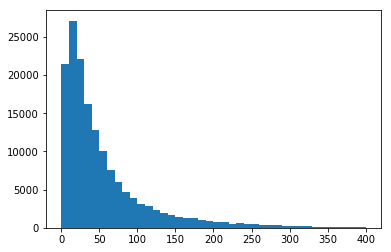

In [61]:
plt.hist(totalNumWords,bins = np.arange(0,410,10))
plt.show()

In [62]:
len(list_sentences_train)

159571

In [63]:
# Shape of the input
inp = Input(shape=(maxlen,))

In [67]:
inp.shape

TensorShape([Dimension(None), Dimension(200)])

In [68]:
# The defined structure for our input for final output would be : Input(None,200)->Embedding->LSTM->Max_Pooling->Dropout->
# ->Dense->Dropout->Dense(None,6)

# Embedding uses one-hot encoding and converts the tokenized sentences into vectors which are then projected to a defined vector 
# space and on the basis of distance metric : Embedding layer is just a list of coordinates 

# Embedding Size is nothing but the size of the vector space
embed_size  = 128
x = Embedding(max_features,embed_size)(inp)


In [69]:
#  LSTM takes in a tensor of [Batch Size, Time Steps, Number of Inputs]
#  Batch size is the number of samples in a batch
#  Time steps is the number of recursion it runs for each input
#  Number of inputs is the number of variables(number of words in each sentence in our case
#  Previous embedding layer which outputs a 3-D tensor of (None, 200, 128)
x = LSTM(60,return_sequences = True,name='lstm_layer')(x)

In [70]:
# Before we could pass the output to a normal layer, we need to reshape the 3D tensor into a 2D one
# We use a Global Max Pooling layer which is traditionally used in CNN problems to reduce the dimensionality
x = GlobalMaxPool1D()(x)

In [71]:
# Dropout layer to drop out 10%(0.1) of the nodes
x = Dropout(0.1)(x)

In [72]:
# We connect the output of drop out layer to a densely connected layer and the output passes through a RELU function
x = Dense(50,activation="relu")(x)

In [74]:
x = Dropout(0.1)(x)

In [75]:
# Final since we want output in range (0,1) for six classes we use sigmoid layer
x = Dense(6,activation="sigmoid")(x)

In [76]:
model = Model(inputs = inp,outputs=x)

In [77]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [78]:
batch_size = 32
epochs = 2
model.fit(x_t,y,batch_size=batch_size,epochs=epochs,validation_split=0.2)

Train on 127656 samples, validate on 31915 samples
Epoch 1/2
127656/127656 [==============================] - 2559s - loss: 0.0729 - acc: 0.9770 - val_loss: 0.0500 - val_acc: 0.9820
Epoch 2/2
127656/127656 [==============================] - 2465s - loss: 0.0449 - acc: 0.9831 - val_loss: 0.0465 - val_acc: 0.9829


In [80]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 200)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 200, 128)          2560000   
_________________________________________________________________
lstm_layer (LSTM)            (None, 200, 60)           45360     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 60)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                3050      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
__________

In [88]:
from keras import backend as K
get_3rd_layer_output = K.function([model.layers[0].input],[model.layers[2].output])

In [102]:
layer_output = get_3rd_layer_output([x_t[:1]])[0]
layer_output.shape

(1, 200, 60)

# IMPORTANT NOTES : HOW POOLING/CNN in general are applicable to NLP Problems ?


Instead of image pixels, the input to most NLP tasks are sentences or documents represented as a matrix. Each row of the matrix corresponds to one token, typically a word, but it could be a character. That is, each row is vector that represents a word. Typically, these vectors are word embeddings (low-dimensional representations) like word2vec or GloVe, but they could also be one-hot vectors that index the word into a vocabulary. For a 10 word sentence using a 100-dimensional embedding we would have a 10×100 matrix as our input. That’s our “image”.

In vision, our filters slide over local patches of an image, but in NLP we typically use filters that slide over full rows of the matrix (words). Thus, the “width” of our filters is usually the same as the width of the input matrix.

What about the nice intuitions we had for Computer Vision? Location Invariance and local Compositionality made intuitive sense for images, but not so much for NLP. You probably do care a lot where in the sentence a word appears. Pixels close to each other are likely to be semantically related (part of the same object), but the same isn’t always true for words.

Recurrent Neural Networks make more intuitive sense. They resemble how we process language (or at least how we think we process language): Reading sequentially from left to right. Fortunately, this doesn’t mean that CNNs don’t work.  All models are wrong, but some are useful.

A big argument for CNNs is that they are fast.With a large vocabulary, computing anything more than 3-grams can quickly become expensive. Even Google doesn’t provide anything beyond 5-grams. It’s completely reasonable to have filters of size larger than 5.

Pooling reduces the output dimensionality but (hopefully) keeps the most salient information. You can think of each filter as detecting a specific feature, such as detecting if the sentence contains a negation like “not amazing” for example. If this phrase occurs somewhere in the sentence, the result of applying the filter to that region will yield a large value, but a small value in other regions. By performing the max operation you  are keeping information about whether or not the feature appeared in the sentence, but you are losing information about where exactly it appeared. But isn’t this information about locality really useful? Yes, it  is and it’s a bit similar to what a bag of n-grams model is doing. You are losing global information about locality (where in a sentence something happens), but you are keeping local information captured by your filters, like “not amazing” being very different from “amazing not”.

If you want to explore further how CNNs are useful in NLP go to : http://www.wildml.com/2015/11/understanding-convolutional-neural-networks-for-nlp/

The above notes have been prepared from there only.